In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_excel("World military power.xlsx",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,2020 ranking,NaN,Airforce Strength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Geography,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
2,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
3,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
4,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734


In [4]:
df.drop([0], axis=0, inplace=True)

In [5]:
df.columns = df.iloc[0]

In [6]:
df.drop([1], axis=0, inplace=True)

In [7]:
df.head()

1,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
2,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
3,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
4,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
5,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369
6,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968


In [8]:
df.shape

(138, 60)

In [14]:
df["Navy Fleet Strengths"].value_counts()

Afghanistan     1
Panama          1
Singapore       1
Sierra Leone    1
Serbia          1
               ..
Georgia         1
Gabon           1
France          1
Finland         1
Zimbabwe        1
Name: Navy Fleet Strengths, Length: 124, dtype: int64

In [22]:
df["Total Coastline Coverage"].nunique()

109

In [17]:
df2=df.dropna()

In [19]:
df2.shape

(98, 60)

In [18]:
df2.isnull().sum()

1
Military Strength                          0
Military Strength Power Index              0
Aircraft Strength                          0
Aircraft Strength value                    0
Fighter/Interceptor Strength               0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength                   0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength          0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet                     0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength                  0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength           0
Attack Helicopter Fleet Strength value     0
Tank Strength                              0
Tank Strength value                        0
AFV/APC Strength                           0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength          0
Self-Propelled Artillery Strength value    0
Towed Ar

In [12]:
df.isnull().sum()

1
Military Strength                           0
Military Strength Power Index               0
Aircraft Strength                           0
Aircraft Strength value                     0
Fighter/Interceptor Strength                0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength                    0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength           0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet                      0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength                   0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength            0
Attack Helicopter Fleet Strength value      0
Tank Strength                               0
Tank Strength value                         0
AFV/APC Strength                            0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength           0
Self-Propelled Artillery Strengt

In [13]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [26]:
df_dummies = pd.get_dummies(df2,drop_first=True)

In [118]:
model = KMeans(n_clusters=3)

In [119]:
model = model.fit(df_dummies)

In [120]:
pred = model.predict(df_dummies)

In [121]:
sonuc = pd.DataFrame(pred)

In [122]:
silhouette_score(df_dummies,sonuc)

0.030566528848158143

In [123]:
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model = KMeans(n_clusters=no_of_cluster)
        model = model.fit(x)
        pred = model.predict(x)
        score = silhouette_score(x,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))

In [124]:
clust = df_dummies.assign(Cluster = model.labels_)
model.cluster_centers_.astype("int")
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [125]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model = KMeans(n_clusters = no_of_cluster)
        pred = model.fit_predict(df_dummies)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(df_dummies,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(3)

Number of cluster 2, silhouette 0.03107680667496657
Number of cluster 3, silhouette 0.017923455350395186


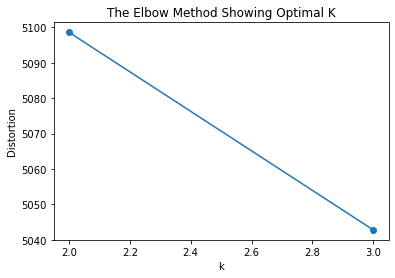

In [126]:
plt.plot(allclusters,sum_of_squared_distances,marker="o")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method Showing Optimal K")
plt.show()